## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055


0:	learn: 0.9629179	total: 49ms	remaining: 49s
1:	learn: 0.9301086	total: 51ms	remaining: 25.5s
2:	learn: 0.9005637	total: 53ms	remaining: 17.6s
3:	learn: 0.8720983	total: 55.1ms	remaining: 13.7s
4:	learn: 0.8467410	total: 57.1ms	remaining: 11.4s
5:	learn: 0.8226672	total: 59ms	remaining: 9.78s
6:	learn: 0.7994702	total: 61.1ms	remaining: 8.67s
7:	learn: 0.7784272	total: 62.9ms	remaining: 7.8s
8:	learn: 0.7602192	total: 64.8ms	remaining: 7.13s
9:	learn: 0.7412421	total: 66.6ms	remaining: 6.6s
10:	learn: 0.7247930	total: 68.5ms	remaining: 6.16s
11:	learn: 0.7089951	total: 70.6ms	remaining: 5.82s
12:	learn: 0.6951345	total: 72.5ms	remaining: 5.51s
13:	learn: 0.6809276	total: 74.4ms	remaining: 5.24s
14:	learn: 0.6692630	total: 76.3ms	remaining: 5.01s
15:	learn: 0.6588323	total: 78.1ms	remaining: 4.81s
16:	learn: 0.6472700	total: 79.9ms	remaining: 4.62s
17:	learn: 0.6379982	total: 81.7ms	remaining: 4.46s
18:	learn: 0.6294674	total: 83.5ms	remaining: 4.31s
19:	learn: 0.6193295	total: 85.4ms

61:	learn: 0.4801376	total: 167ms	remaining: 2.53s
62:	learn: 0.4792422	total: 169ms	remaining: 2.52s
63:	learn: 0.4780719	total: 171ms	remaining: 2.5s
64:	learn: 0.4771984	total: 173ms	remaining: 2.48s
65:	learn: 0.4759610	total: 175ms	remaining: 2.47s
66:	learn: 0.4750287	total: 176ms	remaining: 2.46s
67:	learn: 0.4740093	total: 178ms	remaining: 2.44s
68:	learn: 0.4732612	total: 180ms	remaining: 2.43s
69:	learn: 0.4727266	total: 182ms	remaining: 2.42s
70:	learn: 0.4716549	total: 184ms	remaining: 2.41s
71:	learn: 0.4709088	total: 186ms	remaining: 2.4s
72:	learn: 0.4697594	total: 188ms	remaining: 2.39s
73:	learn: 0.4690934	total: 190ms	remaining: 2.37s
74:	learn: 0.4680942	total: 192ms	remaining: 2.36s
75:	learn: 0.4672726	total: 193ms	remaining: 2.35s
76:	learn: 0.4664479	total: 195ms	remaining: 2.34s
77:	learn: 0.4656044	total: 197ms	remaining: 2.33s
78:	learn: 0.4645375	total: 199ms	remaining: 2.31s
79:	learn: 0.4639654	total: 201ms	remaining: 2.31s
80:	learn: 0.4628457	total: 203ms

86:	learn: 0.4583577	total: 214ms	remaining: 2.25s
87:	learn: 0.4577999	total: 216ms	remaining: 2.24s
88:	learn: 0.4572657	total: 218ms	remaining: 2.23s
89:	learn: 0.4569360	total: 220ms	remaining: 2.22s
90:	learn: 0.4559969	total: 222ms	remaining: 2.21s
91:	learn: 0.4549716	total: 223ms	remaining: 2.21s
92:	learn: 0.4544919	total: 225ms	remaining: 2.2s
93:	learn: 0.4537693	total: 227ms	remaining: 2.19s
94:	learn: 0.4532673	total: 229ms	remaining: 2.19s
95:	learn: 0.4526987	total: 231ms	remaining: 2.18s
96:	learn: 0.4520952	total: 233ms	remaining: 2.17s
97:	learn: 0.4513919	total: 235ms	remaining: 2.16s
98:	learn: 0.4503747	total: 237ms	remaining: 2.16s
99:	learn: 0.4494783	total: 239ms	remaining: 2.15s
100:	learn: 0.4487329	total: 241ms	remaining: 2.14s
101:	learn: 0.4481325	total: 243ms	remaining: 2.14s
102:	learn: 0.4475445	total: 245ms	remaining: 2.13s
103:	learn: 0.4466014	total: 247ms	remaining: 2.12s
104:	learn: 0.4461730	total: 248ms	remaining: 2.12s
105:	learn: 0.4457259	total

147:	learn: 0.4264987	total: 330ms	remaining: 1.9s
148:	learn: 0.4262192	total: 333ms	remaining: 1.9s
149:	learn: 0.4257966	total: 334ms	remaining: 1.9s
150:	learn: 0.4253062	total: 336ms	remaining: 1.89s
151:	learn: 0.4247446	total: 338ms	remaining: 1.89s
152:	learn: 0.4237365	total: 340ms	remaining: 1.88s
153:	learn: 0.4233079	total: 342ms	remaining: 1.88s
154:	learn: 0.4228876	total: 344ms	remaining: 1.87s
155:	learn: 0.4225404	total: 346ms	remaining: 1.87s
156:	learn: 0.4222831	total: 348ms	remaining: 1.87s
157:	learn: 0.4218088	total: 350ms	remaining: 1.86s
158:	learn: 0.4213239	total: 351ms	remaining: 1.86s
159:	learn: 0.4210022	total: 353ms	remaining: 1.85s
160:	learn: 0.4201256	total: 355ms	remaining: 1.85s
161:	learn: 0.4197073	total: 357ms	remaining: 1.85s
162:	learn: 0.4192052	total: 359ms	remaining: 1.84s
163:	learn: 0.4187949	total: 361ms	remaining: 1.84s
164:	learn: 0.4184572	total: 363ms	remaining: 1.83s
165:	learn: 0.4180680	total: 365ms	remaining: 1.83s
166:	learn: 0.4

172:	learn: 0.4153041	total: 379ms	remaining: 1.81s
173:	learn: 0.4148857	total: 381ms	remaining: 1.81s
174:	learn: 0.4144190	total: 382ms	remaining: 1.8s
175:	learn: 0.4140875	total: 384ms	remaining: 1.8s
176:	learn: 0.4136755	total: 386ms	remaining: 1.79s
177:	learn: 0.4133860	total: 388ms	remaining: 1.79s
178:	learn: 0.4129780	total: 390ms	remaining: 1.79s
179:	learn: 0.4122907	total: 392ms	remaining: 1.78s
180:	learn: 0.4119188	total: 394ms	remaining: 1.78s
181:	learn: 0.4115412	total: 396ms	remaining: 1.78s
182:	learn: 0.4112620	total: 397ms	remaining: 1.77s
183:	learn: 0.4107734	total: 399ms	remaining: 1.77s
184:	learn: 0.4104881	total: 401ms	remaining: 1.77s
185:	learn: 0.4100009	total: 403ms	remaining: 1.76s
186:	learn: 0.4096453	total: 405ms	remaining: 1.76s
187:	learn: 0.4093395	total: 407ms	remaining: 1.76s
188:	learn: 0.4090020	total: 409ms	remaining: 1.75s
189:	learn: 0.4085981	total: 410ms	remaining: 1.75s
190:	learn: 0.4082397	total: 412ms	remaining: 1.75s
191:	learn: 0.

234:	learn: 0.3945894	total: 495ms	remaining: 1.61s
235:	learn: 0.3944181	total: 497ms	remaining: 1.61s
236:	learn: 0.3941497	total: 499ms	remaining: 1.6s
237:	learn: 0.3939819	total: 501ms	remaining: 1.6s
238:	learn: 0.3938322	total: 502ms	remaining: 1.6s
239:	learn: 0.3935463	total: 504ms	remaining: 1.6s
240:	learn: 0.3933166	total: 506ms	remaining: 1.59s
241:	learn: 0.3930992	total: 508ms	remaining: 1.59s
242:	learn: 0.3928898	total: 511ms	remaining: 1.59s
243:	learn: 0.3926199	total: 513ms	remaining: 1.59s
244:	learn: 0.3923955	total: 515ms	remaining: 1.59s
245:	learn: 0.3922312	total: 517ms	remaining: 1.58s
246:	learn: 0.3919499	total: 519ms	remaining: 1.58s
247:	learn: 0.3917420	total: 520ms	remaining: 1.58s
248:	learn: 0.3915186	total: 522ms	remaining: 1.57s
249:	learn: 0.3912759	total: 524ms	remaining: 1.57s
250:	learn: 0.3908375	total: 526ms	remaining: 1.57s
251:	learn: 0.3904815	total: 528ms	remaining: 1.57s
252:	learn: 0.3902127	total: 530ms	remaining: 1.56s
253:	learn: 0.39

259:	learn: 0.3886531	total: 543ms	remaining: 1.54s
260:	learn: 0.3884539	total: 545ms	remaining: 1.54s
261:	learn: 0.3882459	total: 547ms	remaining: 1.54s
262:	learn: 0.3881101	total: 549ms	remaining: 1.54s
263:	learn: 0.3879324	total: 550ms	remaining: 1.53s
264:	learn: 0.3876861	total: 552ms	remaining: 1.53s
265:	learn: 0.3874255	total: 554ms	remaining: 1.53s
266:	learn: 0.3868515	total: 556ms	remaining: 1.53s
267:	learn: 0.3866114	total: 558ms	remaining: 1.52s
268:	learn: 0.3863119	total: 560ms	remaining: 1.52s
269:	learn: 0.3860579	total: 562ms	remaining: 1.52s
270:	learn: 0.3858830	total: 564ms	remaining: 1.52s
271:	learn: 0.3857050	total: 566ms	remaining: 1.51s
272:	learn: 0.3855021	total: 568ms	remaining: 1.51s
273:	learn: 0.3852614	total: 569ms	remaining: 1.51s
274:	learn: 0.3851459	total: 571ms	remaining: 1.5s
275:	learn: 0.3849180	total: 573ms	remaining: 1.5s
276:	learn: 0.3846590	total: 575ms	remaining: 1.5s
277:	learn: 0.3844409	total: 577ms	remaining: 1.5s
278:	learn: 0.38

321:	learn: 0.3756076	total: 660ms	remaining: 1.39s
322:	learn: 0.3754123	total: 663ms	remaining: 1.39s
323:	learn: 0.3751852	total: 665ms	remaining: 1.39s
324:	learn: 0.3750004	total: 667ms	remaining: 1.38s
325:	learn: 0.3749086	total: 668ms	remaining: 1.38s
326:	learn: 0.3746654	total: 670ms	remaining: 1.38s
327:	learn: 0.3745405	total: 672ms	remaining: 1.38s
328:	learn: 0.3743710	total: 674ms	remaining: 1.37s
329:	learn: 0.3741679	total: 676ms	remaining: 1.37s
330:	learn: 0.3738646	total: 678ms	remaining: 1.37s
331:	learn: 0.3736647	total: 680ms	remaining: 1.37s
332:	learn: 0.3733429	total: 681ms	remaining: 1.36s
333:	learn: 0.3732059	total: 683ms	remaining: 1.36s
334:	learn: 0.3730574	total: 685ms	remaining: 1.36s
335:	learn: 0.3728663	total: 687ms	remaining: 1.36s
336:	learn: 0.3727111	total: 689ms	remaining: 1.35s
337:	learn: 0.3724765	total: 691ms	remaining: 1.35s
338:	learn: 0.3722959	total: 693ms	remaining: 1.35s
339:	learn: 0.3720213	total: 695ms	remaining: 1.35s
340:	learn: 

346:	learn: 0.3708184	total: 709ms	remaining: 1.33s
347:	learn: 0.3705958	total: 711ms	remaining: 1.33s
348:	learn: 0.3703798	total: 713ms	remaining: 1.33s
349:	learn: 0.3701923	total: 715ms	remaining: 1.33s
350:	learn: 0.3700067	total: 717ms	remaining: 1.33s
351:	learn: 0.3698930	total: 719ms	remaining: 1.32s
352:	learn: 0.3697314	total: 721ms	remaining: 1.32s
353:	learn: 0.3695617	total: 723ms	remaining: 1.32s
354:	learn: 0.3694397	total: 725ms	remaining: 1.32s
355:	learn: 0.3692589	total: 727ms	remaining: 1.31s
356:	learn: 0.3691107	total: 730ms	remaining: 1.31s
357:	learn: 0.3689645	total: 732ms	remaining: 1.31s
358:	learn: 0.3687886	total: 734ms	remaining: 1.31s
359:	learn: 0.3686485	total: 736ms	remaining: 1.31s
360:	learn: 0.3685749	total: 738ms	remaining: 1.31s
361:	learn: 0.3683909	total: 740ms	remaining: 1.3s
362:	learn: 0.3682710	total: 742ms	remaining: 1.3s
363:	learn: 0.3681254	total: 744ms	remaining: 1.3s
364:	learn: 0.3679761	total: 746ms	remaining: 1.3s
365:	learn: 0.36

405:	learn: 0.3613607	total: 824ms	remaining: 1.21s
406:	learn: 0.3612875	total: 826ms	remaining: 1.2s
407:	learn: 0.3611516	total: 828ms	remaining: 1.2s
408:	learn: 0.3609621	total: 830ms	remaining: 1.2s
409:	learn: 0.3608193	total: 831ms	remaining: 1.2s
410:	learn: 0.3604920	total: 833ms	remaining: 1.19s
411:	learn: 0.3603038	total: 835ms	remaining: 1.19s
412:	learn: 0.3602055	total: 837ms	remaining: 1.19s
413:	learn: 0.3599094	total: 839ms	remaining: 1.19s
414:	learn: 0.3597887	total: 841ms	remaining: 1.19s
415:	learn: 0.3595791	total: 843ms	remaining: 1.18s
416:	learn: 0.3594487	total: 845ms	remaining: 1.18s
417:	learn: 0.3592759	total: 847ms	remaining: 1.18s
418:	learn: 0.3591088	total: 849ms	remaining: 1.18s
419:	learn: 0.3589470	total: 850ms	remaining: 1.17s
420:	learn: 0.3587972	total: 853ms	remaining: 1.17s
421:	learn: 0.3586831	total: 854ms	remaining: 1.17s
422:	learn: 0.3585620	total: 856ms	remaining: 1.17s
423:	learn: 0.3584427	total: 858ms	remaining: 1.17s
424:	learn: 0.35

430:	learn: 0.3575528	total: 872ms	remaining: 1.15s
431:	learn: 0.3574686	total: 874ms	remaining: 1.15s
432:	learn: 0.3572923	total: 876ms	remaining: 1.15s
433:	learn: 0.3571859	total: 877ms	remaining: 1.14s
434:	learn: 0.3570185	total: 879ms	remaining: 1.14s
435:	learn: 0.3568416	total: 881ms	remaining: 1.14s
436:	learn: 0.3566846	total: 883ms	remaining: 1.14s
437:	learn: 0.3565875	total: 885ms	remaining: 1.14s
438:	learn: 0.3564768	total: 887ms	remaining: 1.13s
439:	learn: 0.3563559	total: 889ms	remaining: 1.13s
440:	learn: 0.3561557	total: 891ms	remaining: 1.13s
441:	learn: 0.3559793	total: 892ms	remaining: 1.13s
442:	learn: 0.3558695	total: 894ms	remaining: 1.12s
443:	learn: 0.3557039	total: 896ms	remaining: 1.12s
444:	learn: 0.3555934	total: 898ms	remaining: 1.12s
445:	learn: 0.3553700	total: 900ms	remaining: 1.12s
446:	learn: 0.3553048	total: 902ms	remaining: 1.11s
447:	learn: 0.3550824	total: 903ms	remaining: 1.11s
448:	learn: 0.3549146	total: 905ms	remaining: 1.11s
449:	learn: 

491:	learn: 0.3488767	total: 988ms	remaining: 1.02s
492:	learn: 0.3487285	total: 991ms	remaining: 1.02s
493:	learn: 0.3486318	total: 992ms	remaining: 1.02s
494:	learn: 0.3485016	total: 994ms	remaining: 1.01s
495:	learn: 0.3484072	total: 996ms	remaining: 1.01s
496:	learn: 0.3482698	total: 998ms	remaining: 1.01s
497:	learn: 0.3481630	total: 1000ms	remaining: 1.01s
498:	learn: 0.3480855	total: 1s	remaining: 1s
499:	learn: 0.3478655	total: 1s	remaining: 1s
500:	learn: 0.3477966	total: 1s	remaining: 1s
501:	learn: 0.3476142	total: 1.01s	remaining: 999ms
502:	learn: 0.3474667	total: 1.01s	remaining: 997ms
503:	learn: 0.3473844	total: 1.01s	remaining: 995ms
504:	learn: 0.3471852	total: 1.01s	remaining: 993ms
505:	learn: 0.3471124	total: 1.01s	remaining: 991ms
506:	learn: 0.3469987	total: 1.02s	remaining: 989ms
507:	learn: 0.3469000	total: 1.02s	remaining: 986ms
508:	learn: 0.3467621	total: 1.02s	remaining: 984ms
509:	learn: 0.3466653	total: 1.02s	remaining: 982ms
510:	learn: 0.3465795	total: 

518:	learn: 0.3455174	total: 1.04s	remaining: 964ms
519:	learn: 0.3453867	total: 1.04s	remaining: 962ms
520:	learn: 0.3453067	total: 1.04s	remaining: 960ms
521:	learn: 0.3451017	total: 1.05s	remaining: 958ms
522:	learn: 0.3449560	total: 1.05s	remaining: 956ms
523:	learn: 0.3448379	total: 1.05s	remaining: 954ms
524:	learn: 0.3447174	total: 1.05s	remaining: 952ms
525:	learn: 0.3446114	total: 1.05s	remaining: 950ms
526:	learn: 0.3444940	total: 1.05s	remaining: 948ms
527:	learn: 0.3443508	total: 1.06s	remaining: 945ms
528:	learn: 0.3442153	total: 1.06s	remaining: 943ms
529:	learn: 0.3441108	total: 1.06s	remaining: 941ms
530:	learn: 0.3439546	total: 1.06s	remaining: 939ms
531:	learn: 0.3438254	total: 1.06s	remaining: 937ms
532:	learn: 0.3437049	total: 1.07s	remaining: 935ms
533:	learn: 0.3435053	total: 1.07s	remaining: 933ms
534:	learn: 0.3433236	total: 1.07s	remaining: 931ms
535:	learn: 0.3432219	total: 1.07s	remaining: 929ms
536:	learn: 0.3431615	total: 1.07s	remaining: 927ms
537:	learn: 

578:	learn: 0.3384814	total: 1.15s	remaining: 839ms
579:	learn: 0.3383559	total: 1.16s	remaining: 837ms
580:	learn: 0.3382469	total: 1.16s	remaining: 835ms
581:	learn: 0.3381645	total: 1.16s	remaining: 833ms
582:	learn: 0.3380538	total: 1.16s	remaining: 830ms
583:	learn: 0.3379690	total: 1.16s	remaining: 828ms
584:	learn: 0.3378924	total: 1.17s	remaining: 826ms
585:	learn: 0.3378307	total: 1.17s	remaining: 824ms
586:	learn: 0.3377186	total: 1.17s	remaining: 822ms
587:	learn: 0.3376434	total: 1.17s	remaining: 820ms
588:	learn: 0.3375696	total: 1.17s	remaining: 818ms
589:	learn: 0.3374902	total: 1.17s	remaining: 816ms
590:	learn: 0.3373056	total: 1.18s	remaining: 814ms
591:	learn: 0.3371913	total: 1.18s	remaining: 812ms
592:	learn: 0.3371272	total: 1.18s	remaining: 810ms
593:	learn: 0.3370368	total: 1.18s	remaining: 808ms
594:	learn: 0.3368150	total: 1.18s	remaining: 806ms
595:	learn: 0.3367491	total: 1.19s	remaining: 804ms
596:	learn: 0.3366496	total: 1.19s	remaining: 802ms
597:	learn: 

606:	learn: 0.3356597	total: 1.21s	remaining: 781ms
607:	learn: 0.3355448	total: 1.21s	remaining: 779ms
608:	learn: 0.3354512	total: 1.21s	remaining: 777ms
609:	learn: 0.3353398	total: 1.21s	remaining: 775ms
610:	learn: 0.3352669	total: 1.21s	remaining: 773ms
611:	learn: 0.3351716	total: 1.22s	remaining: 771ms
612:	learn: 0.3351155	total: 1.22s	remaining: 769ms
613:	learn: 0.3350041	total: 1.22s	remaining: 767ms
614:	learn: 0.3349098	total: 1.22s	remaining: 765ms
615:	learn: 0.3348304	total: 1.22s	remaining: 763ms
616:	learn: 0.3347009	total: 1.23s	remaining: 761ms
617:	learn: 0.3346458	total: 1.23s	remaining: 758ms
618:	learn: 0.3345381	total: 1.23s	remaining: 756ms
619:	learn: 0.3344101	total: 1.23s	remaining: 755ms
620:	learn: 0.3343267	total: 1.23s	remaining: 752ms
621:	learn: 0.3342275	total: 1.23s	remaining: 750ms
622:	learn: 0.3341456	total: 1.24s	remaining: 748ms
623:	learn: 0.3340640	total: 1.24s	remaining: 746ms
624:	learn: 0.3339122	total: 1.24s	remaining: 744ms
625:	learn: 

666:	learn: 0.3295999	total: 1.32s	remaining: 658ms
667:	learn: 0.3295390	total: 1.32s	remaining: 656ms
668:	learn: 0.3294195	total: 1.32s	remaining: 654ms
669:	learn: 0.3293185	total: 1.32s	remaining: 652ms
670:	learn: 0.3292086	total: 1.32s	remaining: 650ms
671:	learn: 0.3289913	total: 1.33s	remaining: 648ms
672:	learn: 0.3288859	total: 1.33s	remaining: 646ms
673:	learn: 0.3288145	total: 1.33s	remaining: 644ms
674:	learn: 0.3286969	total: 1.33s	remaining: 642ms
675:	learn: 0.3286108	total: 1.33s	remaining: 640ms
676:	learn: 0.3285218	total: 1.34s	remaining: 638ms
677:	learn: 0.3284620	total: 1.34s	remaining: 636ms
678:	learn: 0.3283999	total: 1.34s	remaining: 634ms
679:	learn: 0.3283506	total: 1.34s	remaining: 632ms
680:	learn: 0.3282208	total: 1.34s	remaining: 630ms
681:	learn: 0.3281020	total: 1.35s	remaining: 628ms
682:	learn: 0.3280328	total: 1.35s	remaining: 626ms
683:	learn: 0.3279574	total: 1.35s	remaining: 624ms
684:	learn: 0.3278928	total: 1.35s	remaining: 622ms
685:	learn: 

695:	learn: 0.3269516	total: 1.37s	remaining: 599ms
696:	learn: 0.3267980	total: 1.37s	remaining: 597ms
697:	learn: 0.3266887	total: 1.38s	remaining: 595ms
698:	learn: 0.3265888	total: 1.38s	remaining: 593ms
699:	learn: 0.3265229	total: 1.38s	remaining: 591ms
700:	learn: 0.3264350	total: 1.38s	remaining: 589ms
701:	learn: 0.3263223	total: 1.38s	remaining: 587ms
702:	learn: 0.3262539	total: 1.39s	remaining: 585ms
703:	learn: 0.3261258	total: 1.39s	remaining: 583ms
704:	learn: 0.3260520	total: 1.39s	remaining: 581ms
705:	learn: 0.3259475	total: 1.39s	remaining: 579ms
706:	learn: 0.3258911	total: 1.39s	remaining: 577ms
707:	learn: 0.3257903	total: 1.39s	remaining: 575ms
708:	learn: 0.3256952	total: 1.4s	remaining: 573ms
709:	learn: 0.3255982	total: 1.4s	remaining: 571ms
710:	learn: 0.3255301	total: 1.4s	remaining: 569ms
711:	learn: 0.3254442	total: 1.4s	remaining: 567ms
712:	learn: 0.3253361	total: 1.4s	remaining: 565ms
713:	learn: 0.3252431	total: 1.41s	remaining: 563ms
714:	learn: 0.325

756:	learn: 0.3216090	total: 1.49s	remaining: 477ms
757:	learn: 0.3215306	total: 1.49s	remaining: 475ms
758:	learn: 0.3214274	total: 1.49s	remaining: 473ms
759:	learn: 0.3212014	total: 1.49s	remaining: 471ms
760:	learn: 0.3211190	total: 1.49s	remaining: 469ms
761:	learn: 0.3210312	total: 1.5s	remaining: 467ms
762:	learn: 0.3209495	total: 1.5s	remaining: 465ms
763:	learn: 0.3208564	total: 1.5s	remaining: 463ms
764:	learn: 0.3207911	total: 1.5s	remaining: 461ms
765:	learn: 0.3206643	total: 1.5s	remaining: 459ms
766:	learn: 0.3205891	total: 1.5s	remaining: 457ms
767:	learn: 0.3204765	total: 1.51s	remaining: 455ms
768:	learn: 0.3203840	total: 1.51s	remaining: 453ms
769:	learn: 0.3203086	total: 1.51s	remaining: 451ms
770:	learn: 0.3202066	total: 1.51s	remaining: 449ms
771:	learn: 0.3200935	total: 1.51s	remaining: 447ms
772:	learn: 0.3200251	total: 1.52s	remaining: 445ms
773:	learn: 0.3199577	total: 1.52s	remaining: 443ms
774:	learn: 0.3198837	total: 1.52s	remaining: 441ms
775:	learn: 0.3198

783:	learn: 0.3190255	total: 1.54s	remaining: 423ms
784:	learn: 0.3189403	total: 1.54s	remaining: 421ms
785:	learn: 0.3188715	total: 1.54s	remaining: 419ms
786:	learn: 0.3188016	total: 1.54s	remaining: 417ms
787:	learn: 0.3187670	total: 1.54s	remaining: 415ms
788:	learn: 0.3186601	total: 1.55s	remaining: 413ms
789:	learn: 0.3185886	total: 1.55s	remaining: 412ms
790:	learn: 0.3185418	total: 1.55s	remaining: 410ms
791:	learn: 0.3184514	total: 1.55s	remaining: 408ms
792:	learn: 0.3183529	total: 1.55s	remaining: 406ms
793:	learn: 0.3182569	total: 1.55s	remaining: 404ms
794:	learn: 0.3181932	total: 1.56s	remaining: 402ms
795:	learn: 0.3180848	total: 1.56s	remaining: 400ms
796:	learn: 0.3180327	total: 1.56s	remaining: 398ms
797:	learn: 0.3179305	total: 1.56s	remaining: 396ms
798:	learn: 0.3178456	total: 1.56s	remaining: 394ms
799:	learn: 0.3177655	total: 1.57s	remaining: 392ms
800:	learn: 0.3176826	total: 1.57s	remaining: 390ms
801:	learn: 0.3176217	total: 1.57s	remaining: 388ms
802:	learn: 

843:	learn: 0.3141532	total: 1.65s	remaining: 305ms
844:	learn: 0.3140919	total: 1.65s	remaining: 303ms
845:	learn: 0.3140384	total: 1.65s	remaining: 301ms
846:	learn: 0.3139822	total: 1.66s	remaining: 299ms
847:	learn: 0.3138839	total: 1.66s	remaining: 297ms
848:	learn: 0.3138291	total: 1.66s	remaining: 295ms
849:	learn: 0.3137772	total: 1.66s	remaining: 293ms
850:	learn: 0.3137138	total: 1.66s	remaining: 291ms
851:	learn: 0.3136859	total: 1.67s	remaining: 289ms
852:	learn: 0.3136054	total: 1.67s	remaining: 287ms
853:	learn: 0.3135239	total: 1.67s	remaining: 285ms
854:	learn: 0.3134711	total: 1.67s	remaining: 283ms
855:	learn: 0.3134242	total: 1.67s	remaining: 281ms
856:	learn: 0.3133249	total: 1.67s	remaining: 279ms
857:	learn: 0.3132311	total: 1.68s	remaining: 278ms
858:	learn: 0.3131446	total: 1.68s	remaining: 276ms
859:	learn: 0.3130587	total: 1.68s	remaining: 274ms
860:	learn: 0.3129229	total: 1.68s	remaining: 272ms
861:	learn: 0.3128651	total: 1.68s	remaining: 270ms
862:	learn: 

870:	learn: 0.3121623	total: 1.7s	remaining: 252ms
871:	learn: 0.3121072	total: 1.7s	remaining: 250ms
872:	learn: 0.3120356	total: 1.71s	remaining: 248ms
873:	learn: 0.3119020	total: 1.71s	remaining: 246ms
874:	learn: 0.3118603	total: 1.71s	remaining: 244ms
875:	learn: 0.3117861	total: 1.71s	remaining: 242ms
876:	learn: 0.3116810	total: 1.71s	remaining: 240ms
877:	learn: 0.3116088	total: 1.72s	remaining: 238ms
878:	learn: 0.3115190	total: 1.72s	remaining: 236ms
879:	learn: 0.3114687	total: 1.72s	remaining: 234ms
880:	learn: 0.3113934	total: 1.72s	remaining: 232ms
881:	learn: 0.3113378	total: 1.72s	remaining: 230ms
882:	learn: 0.3112367	total: 1.72s	remaining: 228ms
883:	learn: 0.3111915	total: 1.73s	remaining: 227ms
884:	learn: 0.3111075	total: 1.73s	remaining: 225ms
885:	learn: 0.3110486	total: 1.73s	remaining: 223ms
886:	learn: 0.3109334	total: 1.73s	remaining: 221ms
887:	learn: 0.3108347	total: 1.73s	remaining: 219ms
888:	learn: 0.3107647	total: 1.74s	remaining: 217ms
889:	learn: 0.

928:	learn: 0.3079770	total: 1.81s	remaining: 139ms
929:	learn: 0.3079316	total: 1.81s	remaining: 137ms
930:	learn: 0.3078660	total: 1.82s	remaining: 135ms
931:	learn: 0.3078147	total: 1.82s	remaining: 133ms
932:	learn: 0.3077165	total: 1.82s	remaining: 131ms
933:	learn: 0.3076207	total: 1.82s	remaining: 129ms
934:	learn: 0.3075333	total: 1.82s	remaining: 127ms
935:	learn: 0.3074829	total: 1.83s	remaining: 125ms
936:	learn: 0.3074088	total: 1.83s	remaining: 123ms
937:	learn: 0.3073356	total: 1.83s	remaining: 121ms
938:	learn: 0.3072158	total: 1.83s	remaining: 119ms
939:	learn: 0.3071693	total: 1.83s	remaining: 117ms
940:	learn: 0.3071043	total: 1.84s	remaining: 115ms
941:	learn: 0.3070506	total: 1.84s	remaining: 113ms
942:	learn: 0.3070046	total: 1.84s	remaining: 111ms
943:	learn: 0.3069525	total: 1.84s	remaining: 109ms
944:	learn: 0.3068968	total: 1.84s	remaining: 107ms
945:	learn: 0.3068564	total: 1.85s	remaining: 105ms
946:	learn: 0.3067279	total: 1.85s	remaining: 103ms
947:	learn: 

955:	learn: 0.3060576	total: 1.87s	remaining: 85.9ms
956:	learn: 0.3059772	total: 1.87s	remaining: 84ms
957:	learn: 0.3058989	total: 1.87s	remaining: 82ms
958:	learn: 0.3057985	total: 1.87s	remaining: 80.1ms
959:	learn: 0.3056692	total: 1.88s	remaining: 78.1ms
960:	learn: 0.3055777	total: 1.88s	remaining: 76.2ms
961:	learn: 0.3054462	total: 1.88s	remaining: 74.2ms
962:	learn: 0.3053516	total: 1.88s	remaining: 72.3ms
963:	learn: 0.3052664	total: 1.88s	remaining: 70.3ms
964:	learn: 0.3052264	total: 1.89s	remaining: 68.4ms
965:	learn: 0.3051873	total: 1.89s	remaining: 66.4ms
966:	learn: 0.3051018	total: 1.89s	remaining: 64.5ms
967:	learn: 0.3050172	total: 1.89s	remaining: 62.5ms
968:	learn: 0.3049470	total: 1.89s	remaining: 60.6ms
969:	learn: 0.3049028	total: 1.9s	remaining: 58.6ms
970:	learn: 0.3048446	total: 1.9s	remaining: 56.7ms
971:	learn: 0.3047712	total: 1.9s	remaining: 54.7ms
972:	learn: 0.3047313	total: 1.9s	remaining: 52.8ms
973:	learn: 0.3046600	total: 1.91s	remaining: 50.9ms
9

# ABC - GAN Model with skip connection

In [10]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.1, betas=(0.5, 0.999))


In [11]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [12]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.08619717286666163


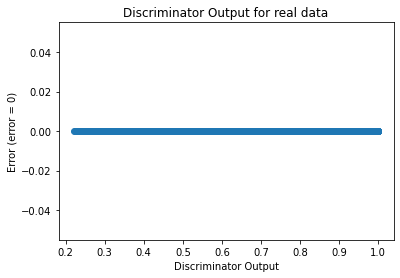

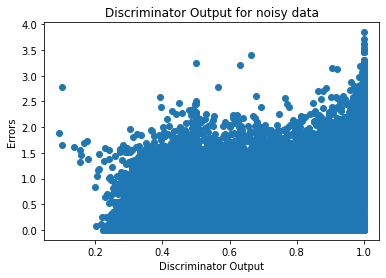

In [13]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [14]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], device='cuda:0', requires_grad=True)
